In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import sqlite3

# Importando o Geojson com os municípios do Brasil

### Criando um Dataframe Geopandas

In [19]:
gjson = "geojs-100-mun.json"
br = gpd.read_file(gjson)
br = br.drop(columns = 'description')
print(type(br))
br.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,id,name,geometry
0,1100015,Alta Floresta D'Oeste,"POLYGON ((-62.18209 -11.86686, -62.16230 -11.8..."
1,1100023,Ariquemes,"POLYGON ((-62.53595 -9.73182, -62.50782 -9.754..."
2,1100031,Cabixi,"POLYGON ((-60.39940 -13.45584, -60.40195 -13.4..."
3,1100049,Cacoal,"POLYGON ((-61.00051 -11.39796, -61.01794 -11.4..."
4,1100056,Cerejeiras,"POLYGON ((-61.50047 -13.00392, -61.47901 -13.0..."


<AxesSubplot:>

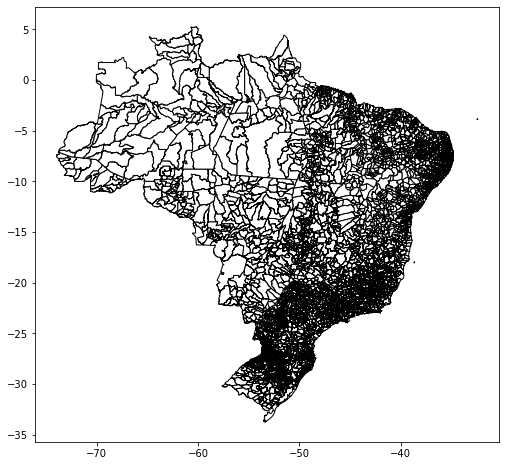

In [18]:
br.plot(color='white', edgecolor='black', figsize=(15,8))

### Transformando em um Dataframe Pandas

In [4]:
br = pd.DataFrame(br)
print(type(br))

<class 'pandas.core.frame.DataFrame'>


### Transformando o tipo de geometria para string

In [5]:
br['geometry']= br['geometry'].astype(str)

### Fazendo a conexão com o sqlite para criar a base de dados com os municípios do Brasil

In [6]:
conn = sqlite3.connect(os.path.join('brasil.db'))
cur = conn.cursor()
cur.execute('''CREATE TABLE IF NOT EXISTS brasil
             ('id' INT NOT NULL,
             'index' INT PRIMARY KEY NOT NULL,
             'name' text, 
             'geometry' text)''')
conn.commit()

In [7]:
br.to_sql('brasil', con=conn, if_exists='replace')
conn.commit()

In [8]:
br = pd.read_sql('SELECT name, geometry FROM brasil', conn)
br.head()

,name,geometry
0,Alta Floresta D'Oeste,"POLYGON ((-62.182088857 -11.8668597878, -62.16..."
1,Ariquemes,"POLYGON ((-62.5359497334 -9.7318235272, -62.50..."
2,Cabixi,"POLYGON ((-60.3993982597 -13.4558418276, -60.4..."
3,Cacoal,"POLYGON ((-61.0005091459 -11.3979601547, -61.0..."
4,Cerejeiras,"POLYGON ((-61.5004673575 -13.0039232604, -61.4..."


# Importando json com os dados

### Criando um Dataframe Geopandas

In [9]:
json = "pib.json"
pib = gpd.read_file(json)
print(type(pib))

<class 'geopandas.geodataframe.GeoDataFrame'>


### Transformando em um Dataframe Pandas

In [10]:
pib = pd.DataFrame(pib)
print(type(pib))
pib.head()

<class 'pandas.core.frame.DataFrame'>


,id,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geometry
0,vw_pib_percapita.fid-2e5b397f_17cf1b12db8_-5754,215,BAHIA,Tremedal,2010,5.788399e+04,18433.0,3140.24,Produto Interno Bruto per capita,- 9639.65,1,"MULTIPOLYGON (((-41.45880 -14.78142, -41.45497..."
1,vw_pib_percapita.fid-2e5b397f_17cf1b12db8_-5753,306,RIO GRANDE DO SUL,Turuçu,2010,4.572388e+04,4000.0,11430.97,Produto Interno Bruto per capita,9639.65 - 22144.80,2,"MULTIPOLYGON (((-52.03535 -31.56751, -52.04061..."
2,vw_pib_percapita.fid-2e5b397f_17cf1b12db8_-5752,900,ESPIRITO SANTO,Vitória,2010,1.978263e+07,320156.0,61790.59,Produto Interno Bruto per capita,52702.10 - 133669.00,4,"MULTIPOLYGON Z (((-40.32926 -20.23997 0.00000,..."
3,vw_pib_percapita.fid-2e5b397f_17cf1b12db8_-5751,3613,MINAS GERAIS,Jacutinga,2010,2.478160e+05,21424.0,11567.21,Produto Interno Bruto per capita,9639.65 - 22144.80,2,"MULTIPOLYGON (((-46.50528 -22.34001, -46.51575..."
4,vw_pib_percapita.fid-2e5b397f_17cf1b12db8_-5750,1028,PIAUÍ,Nazária,2010,2.095138e+04,7895.0,2653.75,Produto Interno Bruto per capita,- 9639.65,1,"POLYGON Z ((-42.82669 -5.34803 0.00000, -42.82..."


### Transformando o tipo de geometria para string

In [11]:
pib['geometry']= pib['geometry'].astype(str)

### Fazendo a conexão com o sqlite para criar a base de dados com as informações sobre o PIB

In [12]:
conn = sqlite3.connect(os.path.join('pib.db'))
cur = conn.cursor()
cur.execute('''CREATE TABLE IF NOT EXISTS pib
             ('id' INT NOT NULL,
             'index' INT PRIMARY KEY NOT NULL,
             'gid' INT,
             'UF' text,
             'nome' text,
             'Censo' text,
             'PIB' FLOAT,
             'Pop_est_2009' FLOAT,
             'PIB_percapita' FLOAT,
             'Descrição' text,
             'legenda' text,
             'classe' INT,
             'geometry' text)''')
conn.commit()

In [13]:
pib.to_sql('pib', con=conn, if_exists='replace')
conn.commit()

In [14]:
pib = pd.read_sql('SELECT UF, nome, Censo, PIB, Pop_est_2009, PIB_percapita, classe, geometry FROM pib', conn)
pib.head()

,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,classe,geometry
0,BAHIA,Tremedal,2010,5.788399e+04,18433.0,3140.24,1,"MULTIPOLYGON (((-41.45880331 -14.78141546, -41..."
1,RIO GRANDE DO SUL,Turuçu,2010,4.572388e+04,4000.0,11430.97,2,"MULTIPOLYGON (((-52.03534993 -31.56750961, -52..."
2,ESPIRITO SANTO,Vitória,2010,1.978263e+07,320156.0,61790.59,4,"MULTIPOLYGON Z (((-40.3292567 -20.23997418 0, ..."
3,MINAS GERAIS,Jacutinga,2010,2.478160e+05,21424.0,11567.21,2,"MULTIPOLYGON (((-46.5052816 -22.34001209, -46...."
4,PIAUÍ,Nazária,2010,2.095138e+04,7895.0,2653.75,1,"POLYGON Z ((-42.82668541 -5.34802917 0, -42.82..."


In [15]:
pib.groupby('UF')[['PIB', 'Pop_est_2009', 'PIB_percapita']].agg(['mean', 'median'])

PIB                Pop_est_2009             \
                             mean        median          mean     median   
UF                                                                         
ACRE                 3.357471e+05  1.506912e+05  3.141509e+04    14478.5   
ALAGOAS              2.081858e+05  5.950859e+04  3.094224e+04    17085.0   
AMAPÁ                4.627743e+05  1.085221e+05  3.916306e+04    10405.0   
AMAZONAS             8.002299e+05  8.683979e+04  5.473176e+04    19497.5   
BAHIA                3.287162e+05  6.892531e+04  3.510159e+04    17096.0   
CEARÁ                3.570857e+05  7.705904e+04  4.645548e+04    21029.5   
DISTRITO FEDERAL     1.314873e+08  1.314873e+08  2.606885e+06  2606885.0   
ESPIRITO SANTO       8.559360e+05  1.818472e+05  4.470768e+04    17802.5   
GOIÁS                3.480299e+05  7.314502e+04  2.409065e+04     6655.0   
MARANHÃO             1.836621e+05  6.382151e+04  2.934165e+04    16503.0   
MATO GROSSO          4.063418e+05  1.664860e+05  2.128860e+04     9903.0   
MATO GROSSO DO SUL   4.662576e+05  1.849436e+05  3.026279e+04    14224.0   
MINAS GERAIS         3.365237e+05  5.873659e+04  2.348613e+04     8073.0   
PARANÁ               4.761703e+05  1.021368e+05  2.678257e+04     9267.0   
PARAÍBA              1.287830e+05  3.030234e+04  1.690573e+04     7256.0   
PARÁ                 4.084044e+05  9.988815e+04  5.196517e+04    27543.0   
PERNAMBUCO           4.223083e+05  9.242816e+04  4.747873e+04    20788.0   
PIAUÍ                8.496725e+04  2.157257e+04  1.404163e+04     5994.0   
RIO DE JANEIRO       3.846501e+06  5.237497e+05  1.740264e+05    33396.0   
RIO GRANDE DO NORTE  1.670957e+05  3.658362e+04  1.878767e+04     7559.0   
RIO GRANDE DO SUL    4.352094e+05  8.336688e+04  2.200429e+04     5740.5   
RONDÔNIA             3.891576e+05  1.620212e+05  2.892169e+04    14056.5   
RORAIMA              3.728994e+05  9.344257e+04  2.809993e+04     9220.0   
SANTA CATARINA       4.430248e+05  1.161696e+05  2.088308e+04     7650.0   
SERGIPE              2.635615e+05  8.603326e+04  2.692905e+04    13502.0   
SÃO PAULO            1.681168e+06  1.585774e+05  6.416130e+04    12796.0   
TOCANTINS            1.048300e+05  3.874255e+04  9.295331e+03     4743.0   

                    PIB_percapita             
                             mean     median  
UF                                            
ACRE                  9387.156818   9351.605  
ALAGOAS               4297.288627   3828.925  
AMAPÁ                11346.750000  10667.875  
AMAZONAS              5313.389839   4395.375  
BAHIA                 6225.330024   4028.040  
CEARÁ                 4446.584565   3747.975  
DISTRITO FEDERAL     50438.460000  50438.460  
ESPIRITO SANTO       13035.831667   9466.295  
GOIÁS                13264.352276   9968.885  
MARANHÃO              4427.224562   3592.030  
MATO GROSSO          19932.891702  13677.210  
MATO GROSSO DO SUL   14458.896923  13886.155  
MINAS GERAIS          9795.166260   7234.820  
PARANÁ               12509.348596  10803.580  
PARAÍBA               4834.960583   4158.120  
PARÁ                  5393.456503   3877.830  
PERNAMBUCO            5558.678817   4318.980  
PIAUÍ                 4017.086964   3433.370  
RIO DE JANEIRO       19196.397935  11511.790  
RIO GRANDE DO NORTE   6118.360838   4759.830  
RIO GRANDE DO SUL    16564.925504  14305.870  
RONDÔNIA             12878.538077  11962.125  
RORAIMA              10172.272000   9993.260  
SANTA CATARINA       17071.466075  15072.710  
SERGIPE               8455.237867   5546.510  
SÃO PAULO            17520.016310  13072.900  
TOCANTINS            10117.758273   7931.200